<a href="https://colab.research.google.com/github/angel442002/repositorio_tareas/blob/main/Practica_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/P3-Practica-Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⭕ Práctica de clasificación

## 1. Práctica en clase



Vamos a trabajar con el dataset PIMA. El objetivo es

 *Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?*

Número de embarazos (Pregnancies):

    Cantidad total de embarazos que la paciente ha tenido.

Concentración de glucosa en plasma (Glucose):

    Nivel de glucosa en sangre a 2 horas en una prueba de tolerancia oral a la glucosa (mg/dL).

    Valores normales: 70–99 mg/dL (en ayunas).

Presión arterial diastólica (BloodPressure):

    Presión sanguínea en mm Hg.

    Valor normal: ≈80 mm Hg.

Grosor del pliegue cutáneo (SkinThickness):

    Medida (en mm) del pliegue cutáneo del tríceps para estimar grasa corporal.

    Valor normal: 10–40 mm.

Insulina sérica (Insulin):

    Nivel de insulina en sangre a 2 horas (muU/mL).

    Valor normal en ayunas: 2–25 μU/mL.

Índice de masa corporal (IMC) (BMI):

    Peso (kg) / altura² (m²).

    Rango saludable: 18.5–24.9.

Función pedigrí de diabetes (DiabetesPedigreeFunction):

    Puntuación que estima la influencia genética basada en antecedentes familiares de diabetes.

    Valor alto: Mayor riesgo genético.

Edad (Age):

    Edad de la paciente en años.

Resultado (Outcome):

    0: No diabetes.

    1: Diabetes diagnosticada.

Vamos a construir dos modelos de clasificación y compararlos

¿Qué clasificador tiene mejor rendimiento en este dataset? Para esto **toma en cuenta el recall en el conjunto de prueba**.

Leamos el dataset

In [1]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/diabetes.csv'
df = pd.read_csv(url)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Usa el método describe del dataframe para observar los rangos de los datos

In [2]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Los ceros en varias columnas representan valores faltantes,

🔵 ¿En cuáles columnas no tienen sentido los valores 0?

Observa los ceros en algunas de estas columnas donde no tienen sentido los ceros

In [3]:
df[df['Insulin']==0].shape

(374, 9)

In [4]:
columnas_cero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columnas_cero:
    ceros = df[df[col]==0].shape[0]
    print(f"{col}: {ceros} ceros ({ceros/len(df)*100:.2f}%)")

Glucose: 5 ceros (0.65%)
BloodPressure: 35 ceros (4.56%)
SkinThickness: 227 ceros (29.56%)
Insulin: 374 ceros (48.70%)
BMI: 11 ceros (1.43%)


🔴 **OPCIONAL**: Haz imputación de los datos con valores 0 en las columnas que consideres necesario

In [5]:
from sklearn.impute import SimpleImputer
import numpy as np
df_antes=df.copy()

# Imputamos con la mediana
imputer = SimpleImputer(missing_values=0, strategy='median')
df_antes[columnas_cero] = imputer.fit_transform(df_antes[columnas_cero])

# Verificamos que ya no hay ceros
print("\nDespués de imputación:")
print(df_antes[columnas_cero].describe())


Después de imputación:
          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.656250      72.386719      29.108073  140.671875   32.455208
std     30.438286      12.096642       8.791221   86.383060    6.875177
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.750000      64.000000      25.000000  121.500000   27.500000
50%    117.000000      72.000000      29.000000  125.000000   32.300000
75%    140.250000      80.000000      32.000000  127.250000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000


🔴 Divide el dataset en train/test usando 80% para entrenamiento

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

🔴 Re escala los datos usando MinMaxScaler o StandardScaler. Recuerda el **data leakage**

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


escalador = StandardScaler()
X_entrenamiento_escalado = escalador.fit_transform(X_entrenamiento)
X_prueba_escalado = escalador.transform(X_prueba)

🔴 Entrena un modelo de SVM y evalua usando la métrica recall en el conjunto de prueba, comparala con el recall en el conjunto de entrenamiento. ¿Hay señales de overfitting?

SVM - Recall en entrenamiento: 0.6635514018691588
SVM - Recall en prueba: 0.6111111111111112


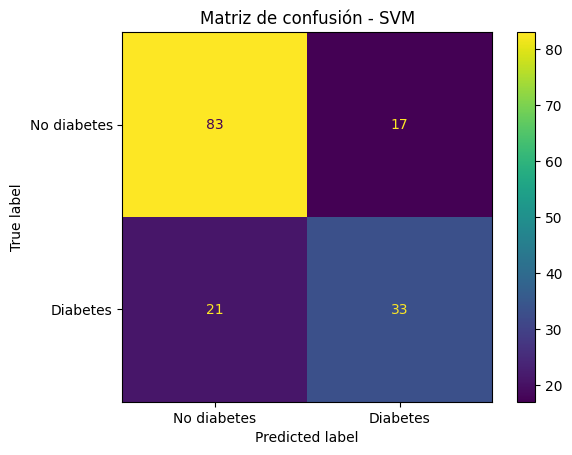

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modelo_svm = SVC()
modelo_svm.fit(X_entrenamiento_escalado, y_entrenamiento)

y_pred_train = modelo_svm.predict(X_entrenamiento_escalado)
y_pred_test = modelo_svm.predict(X_prueba_escalado)

print("SVM - Recall en entrenamiento:", recall_score(y_entrenamiento, y_pred_train))
print("SVM - Recall en prueba:", recall_score(y_prueba, y_pred_test))


ConfusionMatrixDisplay.from_estimator(modelo_svm, X_prueba_escalado, y_prueba, display_labels=["No diabetes", "Diabetes"])
plt.title("Matriz de confusión - SVM")
plt.show()


🔴 Entrena un modelo de Decision Tree / Random Forest y evalua usando la métrica recall en el conjunto de prueba, comparala con el recall en el conjunto de entrenamiento. ¿Hay señales de overfitting?

En este modelo, ¿cuáles son las variables más importantes para predecir la diabetes? ¿Tiene sentido la conclusión?

Random Forest - Recall en entrenamiento: 1.0
Random Forest - Recall en prueba: 0.5925925925925926


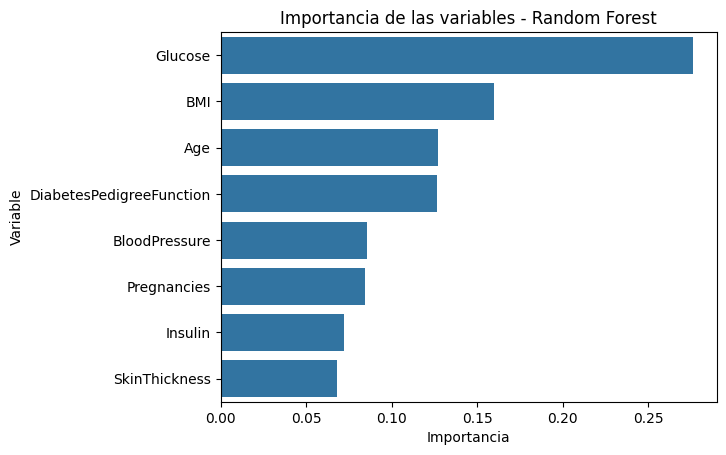

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score

modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_entrenamiento_escalado, y_entrenamiento)

y_pred_train_rf = modelo_rf.predict(X_entrenamiento_escalado)
y_pred_test_rf = modelo_rf.predict(X_prueba_escalado)

print("Random Forest - Recall en entrenamiento:", recall_score(y_entrenamiento, y_pred_train_rf))
print("Random Forest - Recall en prueba:", recall_score(y_prueba, y_pred_test_rf))

importancias = pd.Series(modelo_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=importancias, y=importancias.index)
plt.title("Importancia de las variables - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()

🔴 🔴 Realiza un grid search usando los parámetros descritos a continuación:

Modelo 1:
* SVM
 * C: 0.1,1,10,100
 * kernel: lineal, polinomial, rbf
 * grados (polinomial): 2,3,5

Modelo 2. Escoge uno de los siguientes:
* Decision Tree
 * criterion: gini, entropy, log_loss
 * max_depth: None, 10, 20,
 * min_samples_split: 2, 3, 5
* Random Forest
 * criterion: gini, entropy, log_loss
 * max_depth: None, 10, 20,
 * min_samples_split: 2, 3, 5
* Regresión Logística
 * C: 0.1,1,10
 * penalty: l1, l2, elasticnet, None

In [18]:
from sklearn.model_selection import GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 5]
}

grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='recall')
grid_svm.fit(X_entrenamiento_escalado, y_entrenamiento)

print("Mejores parámetros SVM:", grid_svm.best_params_)
print("Mejor recall en validación:", grid_svm.best_score_)


Mejores parámetros SVM: {'C': 1, 'degree': 2, 'kernel': 'linear'}
Mejor recall en validación: 0.5703211517165006


In [19]:
#Vamos a escoger el Random Forest
param_grid_rf = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 3, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='recall')
grid_rf.fit(X_entrenamiento_escalado, y_entrenamiento)

print("Mejores parámetros Random Forest:", grid_rf.best_params_)
print("Mejor recall en validación:", grid_rf.best_score_)


Mejores parámetros Random Forest: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 3}
Mejor recall en validación: 0.6029900332225914
